In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [2]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [3]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.
    
    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')
    
    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
    
    # Apply label encoding to categorical columns
    le_dict = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_dict[col] = le
    
    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
               'housing', 'loan', 'default']
    X = df[features]
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

Data shape: (45211, 9)


In [4]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        # Randomly select n_clusters indices without replacement
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        return X[random_indices]

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        # Calculate euclidean distance from each point to each centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :], axis=2)
        # Assign each point to the nearest centroid
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            # Get all points assigned to cluster k
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                # Compute mean of cluster points
                new_centroids[k] = cluster_points.mean(axis=0)
            else:
                # If cluster is empty, keep the old centroid
                new_centroids[k] = self.centroids[k]
        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        # Initialize centroids
        self.centroids = self._initialize_centroids(X)
        
        # Iteratively assign and update
        for iteration in range(self.max_iters):
            # Assign clusters
            self.labels = self._assign_clusters(X)
            
            # Update centroids
            new_centroids = self._update_centroids(X, self.labels)
            
            # Check for convergence (if centroids haven't changed much)
            if np.allclose(self.centroids, new_centroids):
                self.centroids = new_centroids
                break
            
            self.centroids = new_centroids
        
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

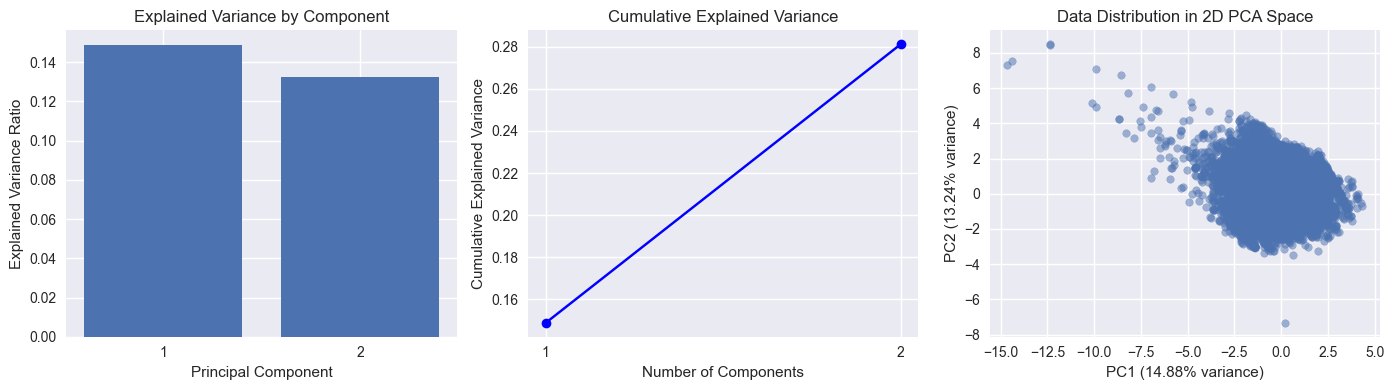

Total explained variance with 2 components: 28.12%
Shape after PCA: (45211, 2)


In [5]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.
    
    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Create visualization
    plt.figure(figsize=(14, 4))
    
    # Plot explained variance
    plt.subplot(1, 3, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Component')
    plt.xticks(range(1, n_components + 1))
    
    # Plot cumulative explained variance
    plt.subplot(1, 3, 2)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, n_components + 1), cumsum, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance')
    plt.xticks(range(1, n_components + 1))
    plt.grid(True)
    
    # Plot data in 2D
    plt.subplot(1, 3, 3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=30)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.title('Data Distribution in 2D PCA Space')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Total explained variance with {n_components} components: {cumsum[-1]:.2%}")
    
    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

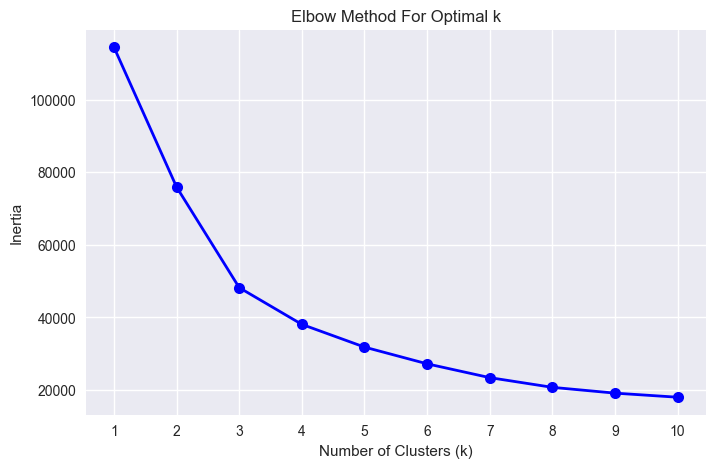

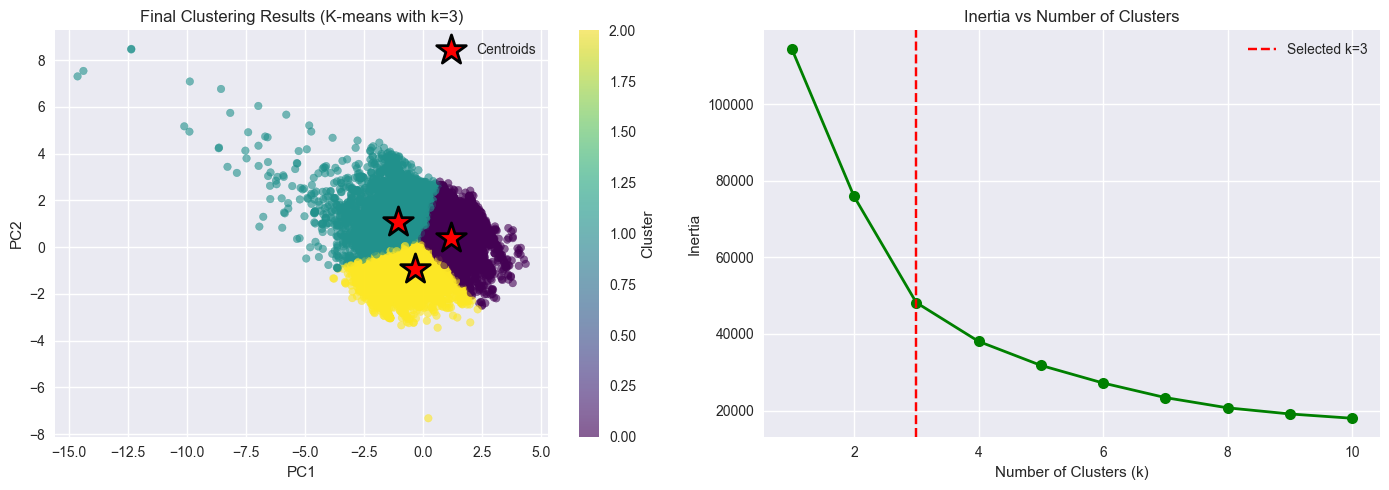


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.3867
Cluster distribution:
  Cluster 0: 15411 samples (34.1%)
  Cluster 1: 10541 samples (23.3%)
  Cluster 2: 19259 samples (42.6%)


In [6]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).
    
    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Calculate distances between points and their assigned centroids
    inertia = 0
    for k in range(len(centroids)):
        # Get points assigned to cluster k
        cluster_points = X[labels == k]
        if len(cluster_points) > 0:
            # Calculate squared distances
            distances = np.linalg.norm(cluster_points - centroids[k], axis=1)
            inertia += np.sum(distances ** 2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.
    
    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    inertias = []
    K = range(1, max_k + 1)
    
    # Calculate inertia for different k values
    for k in K:
        kmeans = KMeansClustering(n_clusters=k)
        kmeans.fit(X)
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        inertias.append(inertia)
    
    # Create elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertias, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.grid(True)
    plt.xticks(K)
    plt.show()
    
    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on elbow curve
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(14, 5))

# Plot clusters
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', s=30, alpha=0.6)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='*', s=500, edgecolors='black', linewidth=2, label='Centroids')
plt.title('Final Clustering Results (K-means with k=3)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True)

# Plot evaluation metrics
plt.subplot(1, 2, 2)
k_values = range(1, len(inertias) + 1)
plt.plot(k_values, inertias, 'go-', linewidth=2, markersize=8)
plt.axvline(x=3, color='r', linestyle='--', label='Selected k=3')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Cluster distribution:")
unique, counts = np.unique(kmeans.labels, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} samples ({count/len(kmeans.labels)*100:.1f}%)")

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.


=== Bisecting K-means Example ===


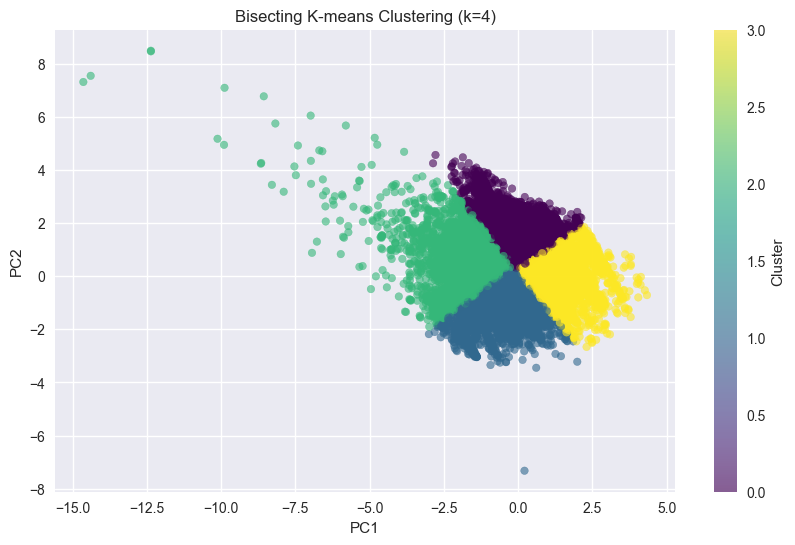

Bisecting K-means created 4 clusters
  Cluster 0: 7639 samples (16.9%)
  Cluster 1: 16348 samples (36.2%)
  Cluster 2: 8429 samples (18.6%)
  Cluster 3: 12795 samples (28.3%)


In [7]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        from sklearn.cluster import KMeans
        
        # Initialize: all points in cluster 0
        self.labels_ = np.zeros(X.shape[0], dtype=int)
        self.centers_ = {0: X.mean(axis=0)}
        
        next_label = 1
        
        # Keep splitting until we have enough clusters
        while len(np.unique(self.labels_)) < self.n_clusters:
            # Find the largest cluster (by size)
            unique_labels = np.unique(self.labels_)
            cluster_sizes = {label: np.sum(self.labels_ == label) for label in unique_labels}
            cluster_to_split = max(cluster_sizes, key=cluster_sizes.get)
            
            # Get points in cluster to split
            mask = self.labels_ == cluster_to_split
            X_cluster = X[mask]
            
            # Apply binary KMeans on this cluster
            kmeans_binary = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            sub_labels = kmeans_binary.fit_predict(X_cluster)
            
            # Update labels: keep cluster_to_split for sub_labels==0, assign new label for sub_labels==1
            # Get indices where mask is True
            mask_indices = np.where(mask)[0]
            # Update labels for points with sub_label == 1
            self.labels_[mask_indices[sub_labels == 1]] = next_label
            
            # Record split in tree
            self.split_tree[cluster_to_split] = (cluster_to_split, next_label)
            
            # Update centroids
            self.centers_[cluster_to_split] = kmeans_binary.cluster_centers_[0]
            self.centers_[next_label] = kmeans_binary.cluster_centers_[1]
            
            next_label += 1
        
        return self.labels_

# Example (for instructor use only):
# bisect = BisectingKMeans(n_clusters=4)
# labels = bisect.fit_predict(X_pca)
# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=30, alpha=0.6)
# plt.title('Bisecting K-means Clustering (k=4)')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.colorbar(label='Cluster')
# plt.grid(True)
# plt.show()

# Test bisecting k-means
print("\n=== Bisecting K-means Example ===")
bisect = BisectingKMeans(n_clusters=4, random_state=42)
bisect_labels = bisect.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=bisect_labels, cmap='viridis', s=30, alpha=0.6)
plt.title('Bisecting K-means Clustering (k=4)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

print(f"Bisecting K-means created {len(np.unique(bisect_labels))} clusters")
unique, counts = np.unique(bisect_labels, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} samples ({count/len(bisect_labels)*100:.1f}%)")

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!